# Normalization

Involves the following steps:
    - removing punctuation
    - converting the entire text into lowercase or uppercase
    - converting numbers into words
    - expanding abbreviation
    - canonicalization of text, etc

In [1]:
text = [' It is a pleasant evening.', 'Guests, who came from US arrived at the venue', "Food was tasty."]

In [3]:
from nltk.tokenize import word_tokenize
tokenized_docs = [word_tokenize(doc) for doc in text]
tokenized_docs

[['It', 'is', 'a', 'pleasant', 'evening', '.'],
 ['Guests', ',', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'],
 ['Food', 'was', 'tasty', '.']]

## Eliminating Punctuation

In [6]:
import re
import string

x = re.compile('[%s]' % re.escape(string.punctuation))
tokenized_docs_no_punctuation = []
for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = x.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    tokenized_docs_no_punctuation.append(new_review)
tokenized_docs_no_punctuation

[['It', 'is', 'a', 'pleasant', 'evening'],
 ['Guests', 'who', 'came', 'from', 'US', 'arrived', 'at', 'the', 'venue'],
 ['Food', 'was', 'tasty']]

## Conversion into lowercase and uppercase

In [11]:
text = 'HarDWork IS KEy to Success'

In [12]:
text.lower()

'hardwork is key to success'

In [13]:
text.upper()

'HARDWORK IS KEY TO SUCCESS'

## Dealing with stopwords

In [18]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alextanhongpin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
stops = set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [38]:
import unittest

def filter_stopwords(words):
    return [word for word in words if word not in stops]

class TestStopwords(unittest.TestCase):
    def test_remove_stopwords(self):
        words = ["Don't", "hesitate", "to", "ask", "questions"]
        filtered = [word for word in words if word not in stops]
        self.assertEqual(filtered, ["Don't", "hesitate", "ask", "questions"])
    
    def test_load_stopwords_ids(self):
        self.assertTrue(len(stopwords.fileids()) > 0)
        self.assertEqual(stopwords.fileids(), ['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish'])
        
if __name__ == '__main__':
    unittest.main(argv=['first arg is ignored'], exit = False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


## Calculating stopwords in english

In [48]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
def para_fraction(text):
    para = [w for w in text if w not in stops]
    return len(para) / len(text)

nltk.download('reuters')
para_fraction(nltk.corpus.reuters.words())

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/alextanhongpin/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


0.7605545002298215

In [50]:
nltk.download('inaugural')
para_fraction(nltk.corpus.inaugural.words())

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/alextanhongpin/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


0.5549113116272687

## Substituting and correcting tokens

In [79]:
# Replacing words using regular expressions

import re 

replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'\'m', ' am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

class RegexReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            (s, count) = re.subn(pattern, repl, s)
        return s

In [80]:
import unittest

class TestRegexReplacer(unittest.TestCase):
    def test_replace(self):
        replacer = RegexReplacer()
        output = replacer.replace("Don't hesitate to ask questions")
        self.assertEqual('Do not hesitate to ask questions', output)
        
        output = replacer.replace("She must've gone to the market but she didn't go")
        self.assertEqual("She must have gone to the market but she did not go", output)
        
        # This is wrong
        output = replacer.replace("I'm good")
        self.assertEqual("I am good", output)

if __name__ == '__main__':
    unittest.main(argv=['first argv is ignored'], exit = False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.007s

OK


## Perform subsitution before replacing

In [86]:
import nltk
from nltk.tokenize import word_tokenize

replacer = RegexReplacer()
text = "Don't hesitate to ask questions"

In [90]:
word_tokenize(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [92]:
word_tokenize(replacer.replace(text))

['Do', 'not', 'hesitate', 'to', 'ask', 'questions']

## Deleting repeating characters 

In [94]:
class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        repl_word = self.repeat_regexp.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [97]:
replacer = RepeatReplacer()
replacer.replace('lotttt')

'lot'

In [99]:
replacer.replace('ohhh')

'oh'

In [103]:
replacer.replace('happy') # Not intended.

'hapy'

In [17]:
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet


class RepeatReplacer(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        return repl_word

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alextanhongpin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
replacer = RepeatReplacer()
replacer.replace("happy")

'happy'

In [20]:
replacer.replace("ohhhh")

'oh'

## Replacing a word with synonym

In [22]:
class WordReplacer(object):
    def __init__(self, word_map):
        self.word_map = word_map
    def replace(self, word):
        return self.word_map.get(word, word)

In [24]:
replacer = WordReplacer({'congrats': 'congratulations'})
replacer.replace('congrats')

'congratulations'

## Zipf's Law

States that the frequency of a token in a text is directly proportional to its rank or position in the sorted list.

In [3]:
import nltk

nltk.download('gutenberg')
from nltk.corpus import gutenberg
from nltk.probability import FreqDist


# pip3 install matplotlib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/alextanhongpin/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
fd = FreqDist()
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd[word] += 1

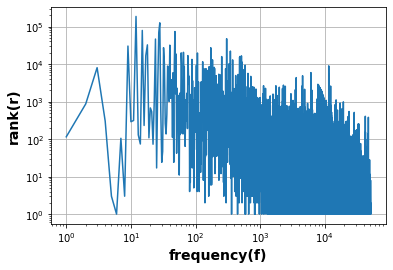

In [6]:
%matplotlib inline

ranks = []
freqs = []
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

plt.loglog(ranks, freqs)
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

In [16]:
from nltk.metrics import accuracy, precision, recall, f_measure

training = 'PERSON OTHER PERSON OTHER OTHER ORGANIZATION'.split(' ')
testing = 'PERSON OTHER OTHER OTHER OTHER OTHER'.split(' ')

In [9]:
accuracy(training, testing)

0.6666666666666666

In [11]:
trainset = set(training)
testset = set(testing)
precision(trainset, testset)

1.0

In [13]:
recall(trainset, testset)

0.6666666666666666

In [17]:
f_measure(trainset, testset)

0.8

# Applying similarity measures using edit distance algorithm

In [19]:
from nltk.metrics import edit_distance

In [20]:
edit_distance('relate', 'relation')

3

In [21]:
edit_distance('suggestion', 'calculation')

7

## Applying similarity measures using Jaccard's Coefficient

In [53]:
def jaccard_similarity(query, document):
    num = set(query).intersection(set(document))
    den = set(query).union(set(document))
    print(num, den)
    return len(num) / len(den)

In [54]:
X = set([10, 20, 30, 40])
y = set([20, 30, 60])

In [57]:
# The smaller the distance, the more similar the values are.
jaccard_similarity(X, y)

{20, 30} {20, 40, 10, 60, 30}


0.4

In [59]:
from nltk.metrics import jaccard_distance

# The nltk.metrics is 1 - jaccard_distance. The higher the value, the more similar the values are.
jaccard_distance(X, y)

0.6

# Similarity Measure using Smith Waterman distance

In [63]:
def binary_distance(X, y):
    return 0.0 if X == y else 1.0

In [74]:
X = set([10, 20, 30, 40])
y = set([30, 50, 70])

In [75]:
binary_distance(X, y)

1.0

In [77]:
from nltk.metrics import binary_distance, masi_distance
binary_distance(X, y)

1.0

In [78]:
masi_distance(X, y)

0.945

In [86]:
def masi_distance(X, y):
    len_intersection = len(X.intersection(y))
    len_union = len(X.union(y))
    m, n = len(X), len(y)
    if m == n and m == len_intersection:
        s = 1
    elif len_intersection == min(m, n):
        s = 0.67
    elif len_intersection > 0:
        s = 0.33
    else:
        s = 0
    return 1 - (len_intersection/float(len_union)) * s

In [87]:
X = set([10, 20, 30, 40])
y = set([30, 50, 70])
masi_distance(X, y)

0.945